In [1]:
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D as ax
import numpy as np
import pandas as pd
get_ipython().magic('matplotlib inline')

In [2]:
def an(x,t):
    return(x-t+np.exp(t))
x1 = np.linspace(0,1,11)
t1 = np.linspace(0,1,11)
X,T = plt.meshgrid(x1, t1)
Z = an(X, T)
res = np.zeros((100,100))
for i in range(100):
    for k in range(100):
        res[i,k] = an(i,k)

In [13]:
def num(L, N):
    
    def a(x):
        return(np.exp(x))
    x = np.zeros(L+1)
    t = np.zeros(N+1)
    tau = np.zeros(N+1)
    u = np.zeros((L+1,N+1))
    
    h = 1/L
    x[0] = 0
    for l in range(L+1):
        x[l] = h*l
        
    t[0]= 0
    tau = 1/N
    for n in range(N+1):
        t[n] = tau*n
        
    for l in range(0,L+1):
        u[l,0] = x[l] + 1
        
    for n in range(1,N+1):
        u[0,n] = np.exp(t[n])-t[n]
    
    
    for l in range(1,L+1):
        for n in range(0,N):
            u[l,n+1] = u[l,n]- tau/h*(u[l,n]-u[l-1,n])+ tau*np.exp(t[n])
    ust = 0
    if (0<=tau/h<=1):
        ust = 1
    return(x,t,u,ust)

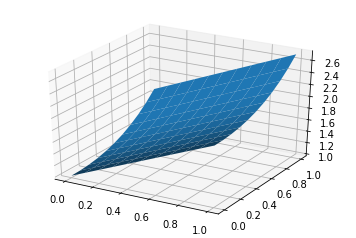

In [14]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, T, Z)
plt.show()

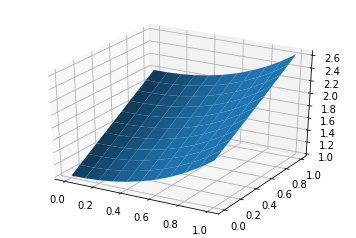

In [15]:
result = num(10,10)

fig = plt.figure()
ax = fig.gca(projection='3d')
X,Y = plt.meshgrid(result[0], result[1])
ax.plot_surface(X, Y, result[2])
plt.show()

In [16]:
print(result[3])

1


In [17]:
q1 = np.zeros(11)
for k in range(11):
    q1[k] = an(k*0.1,1)

In [18]:
result = num(10,10)
q2 = result[2][10]

q3 = abs(q2-q1)

In [12]:
df = pd.DataFrame({'x' : x1, 'an' : q1,'num' : q2, 'abs' : q3})
display(df)

,abs,an,num,x
0,0.281718,1.718282,2.000000,0.0
1,0.181718,1.818282,2.000000,0.1
2,0.092235,1.918282,2.010517,0.2
3,0.014376,2.018282,2.032657,0.3
4,0.050639,2.118282,2.067643,0.4
5,0.101456,2.218282,2.116826,0.5
6,0.136584,2.318282,2.181698,0.6
7,0.154372,2.418282,2.263910,0.7
8,0.152997,2.518282,2.365285,0.8
9,0.130443,2.618282,2.487839,0.9
